### Atalho

<a href="https://colab.research.google.com/github/Vjfrib/sistCom/blob/main/Projetos/2nd%20Projeto%20em%20Python%20%2B%20Apresenta%C3%A7%C3%A3o/Notebook.ipynb#scrollTo=ZGstHHrXwPWC" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Trocar o link -->

# Título: Execução dos Exercícios. Semestre 2024.1

### Entrega
> 10/06/2024, 10:30

#### Aluno(s):
- Vinícius José

#### Professor:
- Diego Rátiva

# Base do Experimeto

- [Livro](https://github.com/Vjfrib/sistCom/blob/main/B_P_Lathi_Sistemas_de_Comunicacoes_Analo.pdf)

# Documentos - Resultado

- [Vídeo](Upar a playlist)
- [Repo](https://github.com/Vjfrib/sistCom)
    - [Documento](https://encurtador.com.br/LUreT)
    - [Colab](https://encurtador.com.br/LUreT) - Atualizar!
    - [Apresentação](https://encurtador.com.br/0jgS8)

# Sugestões do professor

Avaliação:
1. Compartilhe o código com diego.rativa@ecomp.poli.br
2. Salve um vídeo por cada exercício de no máximo 2min explicando o exercício. 
3. Salve o PDF do Colab e adicione na entrega desta tarefa.
4. Serão sorteados estudantes para apresentar os exercícios durante o horário da aula.  

Explicação.
1. Não foque no código, (a disciplina não é de programação) e sim na metodología e os resultados na hora de explicar os fundamentos.
2. Não esqueça de fundamentar-se no livro.

# Execução

In [51]:
# Ambiente

!pip install numpy 
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

### Exercício 1

#### 1.1 Base Matemática
>Utilização da Transformada de Fourier.
<br>

$$X[f] = \sum_{n=0}^{N-1} x[t] \cdot e^{-j\frac{2\pi}{N}nk}$$

In [52]:
# Execução: Parâmetros
Ts = 1/64
T0 = 4
N0 = int(T0 / Ts)

# Vetor de tempo
t = np.arange(0, Ts * N0, Ts)

# Sinal g
g = Ts * np.exp(-2 * t)
g[0] = Ts * 0.5

# Transformada de Fourier
G = np.fft.fft(g)

# Conversão para coordenadas polares
Gp = np.angle(G)
Gm = np.abs(G)

# Vetor k e frequência angular
k = np.arange(N0)
w = 2 * np.pi * k / T0


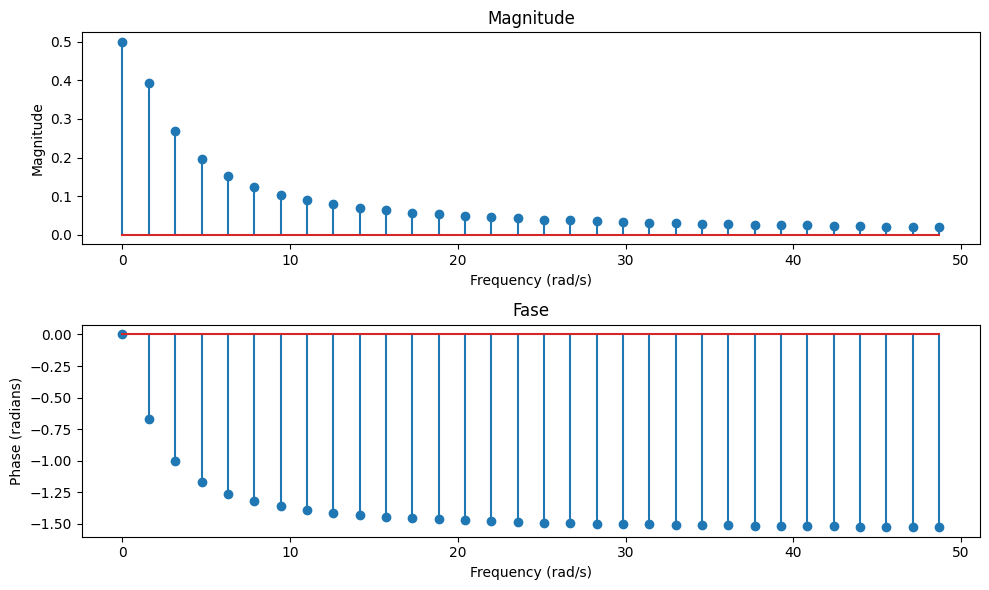

In [53]:
# Plotagem
plt.figure(figsize=(10, 6))

# Magnitude
plt.subplot(211)
plt.stem(w[:32], Gm[:32])
plt.title('Magnitude')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude')

# Fase
plt.subplot(212)
plt.stem(w[:32], Gp[:32])
plt.title('Fase')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()

### Exercício 2

#### 2.1 Base Matemática
>Utilização de conceitos de amostragem e DFT para calcular a DFT de um sinal discreto definido por partes.
<br>

$$G[k] = \sum_{n=0}^{N-1} g[n] \cdot e^{-j\frac{2\pi}{N}nk}$$

In [54]:
# Execução: Parâmetros
B = 4
f0 = 1/4
Ts = 1 / (2 * B)
T0 = 1 / f0
N0 = int(T0 / Ts)

# Vetor k
k = np.arange(N0 + 1)

# Inicializar gk com zeros
gk = np.zeros_like(k)

for m in range(len(k)):
    if 0 <= k[m] <= 3:
        gk[m] = 1
    if k[m] == 4 or k[m] == 28:
        gk[m] = 0.5
    if 5 <= k[m] <= 27:
        gk[m] = 0
    if 29 <= k[m] <= 31:
        gk[m] = 1

# Transformada de Fourier
Gr = np.fft.fft(gk)

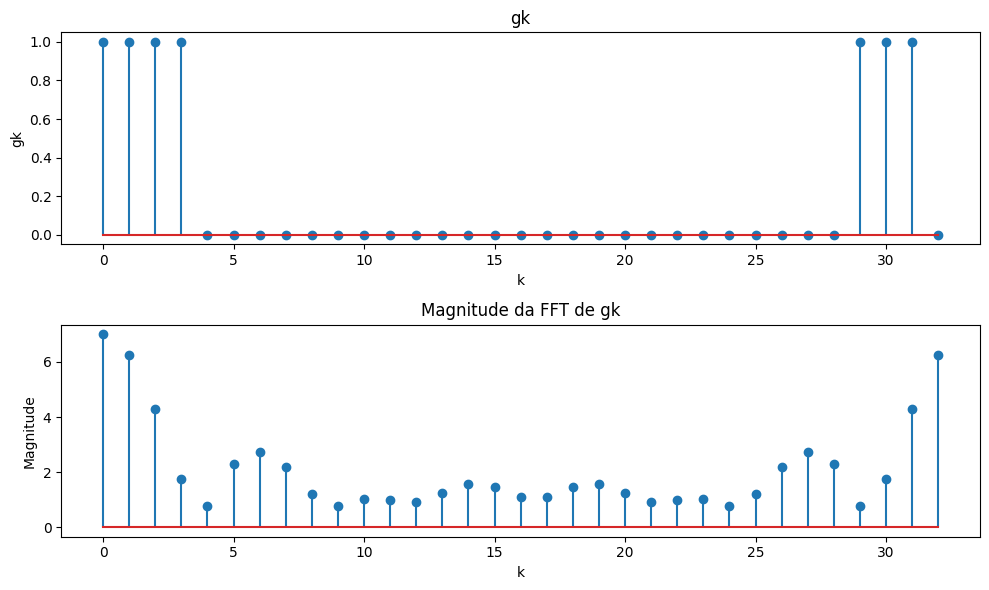

In [55]:
# Plotagem
plt.figure(figsize=(10, 6))

# Gráfico de gk
plt.subplot(211)
plt.stem(k, gk)
plt.title('gk')
plt.xlabel('k')
plt.ylabel('gk')

# Gráfico da magnitude da FFT
plt.subplot(212)
plt.stem(k, np.abs(Gr))
plt.title('Magnitude da FFT de gk')
plt.xlabel('k')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


### Exercício 3

#### 3.1 Base matemática
>Aplicação de conceitos de filtros no domínio da frequência.
<br> <!-- utilizando a multiplicação de espectros na DFT -->

$$Y[k] = H[k] \cdot G[k]$$

In [56]:
# Execução: Definições
q = np.arange(33)
Hq = np.zeros_like(q)  # Inicializar Hq com zeros

for m in range(len(q)):
    if 0 <= q[m] <= 7:
        Hq[m] = 1
    if 25 <= q[m] <= 31:
        Hq[m] = 1
    if 9 <= q[m] <= 23:
        Hq[m] = 0
    if q[m] == 8 or q[m] == 24:
        Hq[m] = 0.5

Gq = np.ones_like(Hq)  # Inicializar Gq como exemplo
Yq = Gq * Hq
yk = np.fft.ifft(Yq)


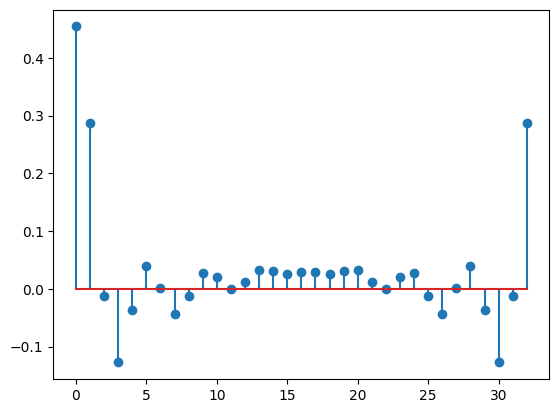

In [57]:
# Plot final
plt.figure()
plt.stem(q, yk.real)  # Plota apenas a parte real de yk
plt.show()